<a href="https://colab.research.google.com/github/v2rinku/Lab-1-Quantum-Algorithm/blob/main/simulators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Quantum Gates in Qiskit

In this episode of Coding with Qiskit, we learned about quantum gates available in Qiskit and some techniques of understanding how the gates work in quantum circuits.

The four representations of the action of quantum gates discussed in the video are:

1. Bra-Ket notation
2. Matrix representation
3. Bloch sphere picture
4. Measurement results

This Jupyter notebook shows the code that was used in the video, as well as updates in the latest version of Qiskit.

**Link to Episode 4:** https://www.youtube.com/watch?v=tBnWG_95F9c

# 1. Bra-Ket notation

Throughout the literature, you will find quantum states written in the Bra-Ket notation. In this notation, the quantum states of our qubits are written as superpositions of $\vert0\rangle$ and $\vert1\rangle$.

In the video, we used the particular example of the $X$ gate, whose action is

$X\vert0\rangle = \vert1\rangle$

$X\vert1\rangle = \vert0\rangle$


# 2. Matrix representation

The matrix representation of the example above is given as

$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$
and
$$\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

The 2x2 matrix above is exactly the $X$ gate in matrix representation.

Here is a method that you can use to determine the matrix representation of the $X$ gate. We build a circuit which contains the gate of interest and execute that circuit using the `unitary_simulator`.

In [ ]:
!pip install qiskit qiskit_aer matplotlib pylatexenc


In [2]:
from qiskit import *
circuit = QuantumCircuit(1,1)
circuit.x(0)

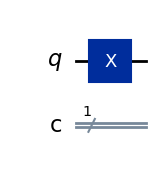

In [8]:
%matplotlib inline
circuit.draw(output='mpl')


**Aer Simulator Backends**

https://qiskit.github.io/qiskit-aer/apidocs/aer_provider.html

**qasm_simulator**
Description: A simulator for quantum circuits that outputs classical bits from measurement results, similar to running a quantum circuit on a real quantum processor. It simulates a quantum circuit using a probabilistic model and produces results in terms of classical bits (0s and 1s).

    

**statevector_simulator**
Description: Simulates quantum circuits and outputs the quantum state vector (i.e., the complex vector that represents the state of the quantum system). This is useful for debugging or verifying the evolution of quantum states, but doesn’t include noise or measurement processes.

**unitary_simulator**
Description: Simulates the unitary matrix that represents the full evolution of a quantum circuit. It provides the entire unitary operation as a matrix, which can be used for analyzing the circuit’s overall transformation.   


In [12]:
from qiskit_aer import  UnitarySimulator
backend = UnitarySimulator()
qc_compiled = transpile(circuit, backend)
job_sim = backend.run(circuit, shots=100)
result = job_sim.result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


In order to determine the quantum state at the output, you can use the `statevector_simulator`

In [13]:
from qiskit_aer import  StatevectorSimulator
circuit = QuantumCircuit(1,1)
circuit.x(0)
backend = StatevectorSimulator()
qc_compiled = transpile(circuit, backend)
job_sim = backend.run(circuit, shots=100)
result = job_sim.result()

statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


As you can see from these two results, we have determined the matrix representation of the $X$ gate, as well as its action on the $\vert0\rangle$ state.

# 3. Bloch sphere picture

The action of a unitary quantum gate on the state of a qubit can be thought of as a rotation on the surface of the Bloch sphere, which is a sphere of radius 1.

You can visualize the `statevector` output from the above code by using the following code

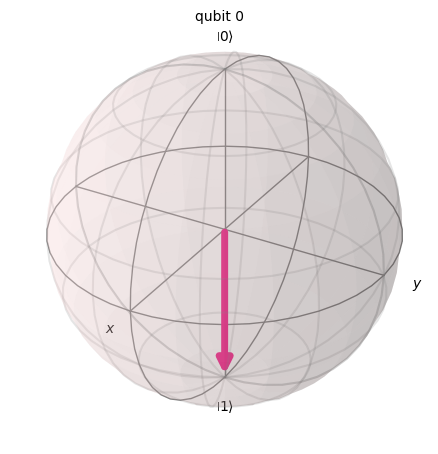

In [14]:
# in the video, we imported from qiskit.tools.visualization.
# this part of Qiskit has been moved to qiskit.visualization, and we recommend using qiskit.visualization instead
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

# 4. Measurement results

The final method of understanding how a gate works is by using measurement results from running a circuit with
the gate using the `qasm_simulator`. You can do this by running the code below.

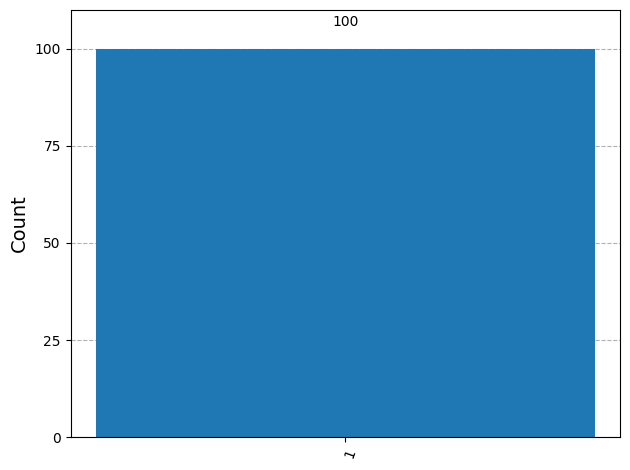

In [15]:
from qiskit_aer import  Aer, QasmSimulator
backend = QasmSimulator()

circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.measure([0], [0])
job_sim = backend.run(circuit, shots=100)
result = job_sim.result()

counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you can see above, the result is that 100% of the 1024 shots returned 1.

# References

For detailed information about Qiskit, check out the tutorials in the Github repository:

https://github.com/Qiskit/qiskit-iqx-tutorials

For a pedagogical presentation of the Bra-Ket notation and the matrix algebra involved in quantum circuits, check out our open-source `Learn Quantum Computation using Qiskit` textbook:

https://community.qiskit.org/textbook/

For an overview of all gates in Qiskit, see:

https://quantum-computing.ibm.com/support/guides/gate-overview